Brain_Tumour(CNN(Vijay Ragavan G))

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
IMG_SIZE=224
BATCH_SIZE=32

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [7]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumor_dataset/train',
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='binary',
subset='training'
)

Found 919 images belonging to 2 classes.


In [9]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumor_dataset/train',
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='binary',
subset='validation'
)

Found 229 images belonging to 2 classes.


In [13]:
model=keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 299s 10s/step - accuracy: 0.5797 - loss: 1.3898 - val_accuracy: 0.6332 - val_loss: 0.5967
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.7509 - loss: 0.4812 - val_accuracy: 0.7205 - val_loss: 0.5178
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.8240 - loss: 0.3730 - val_accuracy: 0.7904 - val_loss: 0.4584
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.8538 - loss: 0.3275 - val_accuracy: 0.8253 - val_loss: 0.3715
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.9057 - loss: 0.2242 - val_accuracy: 0.7773 - val_loss: 0.3627


In [21]:
model.save('/content/drive/MyDrive/Colab Notebooks/brain.h5')

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/Colab Notebooks/brain.h5')
print("Model Loaded")

Model Loaded


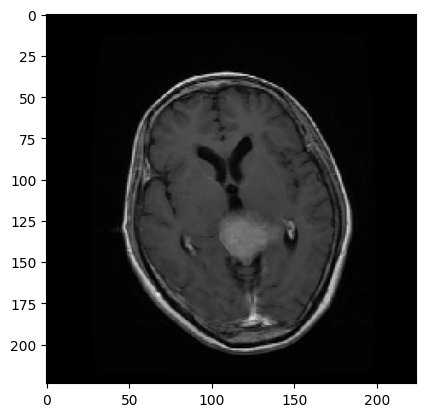

In [25]:
test_image_path="/content/drive/MyDrive/brain_tumor_dataset/train/yes/Y1717.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [26]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0


In [27]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step
[[0.6710939]]


In [29]:
if prediction>=0.5:
    print("you have brain tumour")
else:
    print("you do not have any tumour")

you have brain tumour
